<IPython.core.display.Javascript object>


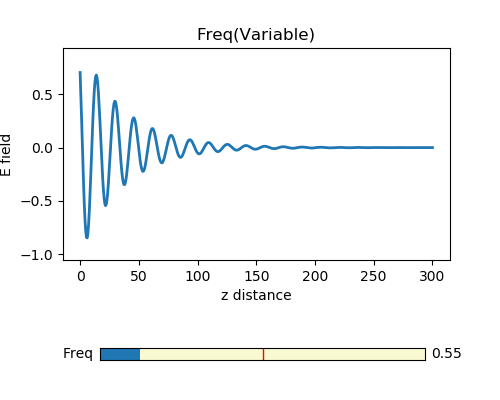

In [2]:
%matplotlib notebook
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w=0.4
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c


zRange,zAmount = 300, 500
z = np.linspace(0,zRange,zAmount)
t=10
E = np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )


# create figure and axes
fig, (ax1) = plt.subplots(1,figsize=(5,4))
line, = plt.plot(z, E, lw=2)
plt.title('Freq(Variable)')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.subplots_adjust(bottom=0.35)



axcolor = 'lightgoldenrodyellow'
axomega = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
somega = Slider(axomega, 'Freq', w0-2*r, w0+2*r, valinit=w0)


def update(val):
    w = somega.val
    E = E_field(z,w)
    line.set_ydata(E)
    fig.canvas.draw_idle()

def E_field(z,w):
    kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
    alpha = 2*kapa
    n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
    k=n*w/c
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )        

somega.on_changed(update)

plt.show()

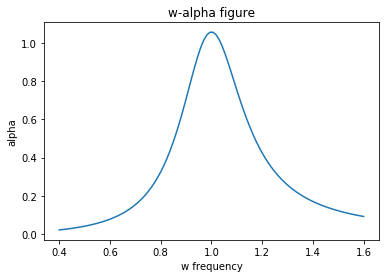

In [8]:
### w-alpha figure ###

import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w = np.linspace(w0-2*r,w0+2*r,100)
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

plt.plot(w,alpha)
plt.title('w-alpha figure')
plt.xlabel('w frequency')
plt.ylabel('alpha')
plt.show()

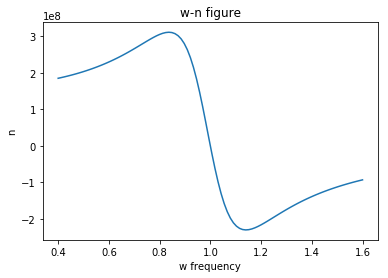

In [9]:
### w-n figure ###

import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w = np.linspace(w0-2*r,w0+2*r,100)
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

plt.plot(w,n-1)
plt.title('w-n figure')
plt.xlabel('w frequency')
plt.ylabel('n')
plt.show()

<IPython.core.display.Javascript object>


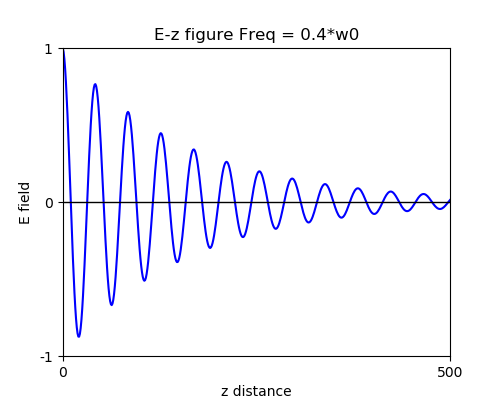

In [10]:
### Animation ###

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w=0.4
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

# Set the range of z and time
zRange,zLength = 300, 500
z = np.linspace(0,zRange,zLength)
tRange, tLength = 100, 10000

# create figure and axes 
fig, (ax1) = plt.subplots(1,figsize=(5,4))

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')


def E_field(z,w,t):
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )

def animate(t):
    
    # create our line object
    E = E_field(z,w,t)
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],  # xticklabels=['0','zRange']
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])

    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.title('E-z figure Freq = 0.4*w0')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.show()


<IPython.core.display.Javascript object>


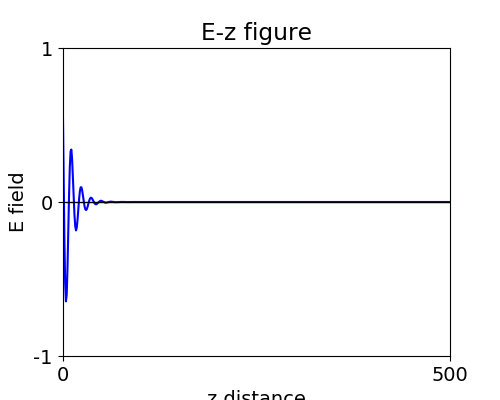

In [40]:
### Animation ###

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w=0.8
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

# Set the range of z and time
zRange,zLength = 300, 500
z = np.linspace(0,zRange,zLength)
tRange, tLength = 100, 10000

# create figure and axes 
fig, (ax1) = plt.subplots(1,figsize=(5,4))

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')


def E_field(z,w,t):
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )

def animate(t):
    
    # create our line object
    E = E_field(z,w,t)
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],  # xticklabels=['0','zRange']
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])
    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.title('E-z figure Freq = 0.8*w0')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.show()



<IPython.core.display.Javascript object>


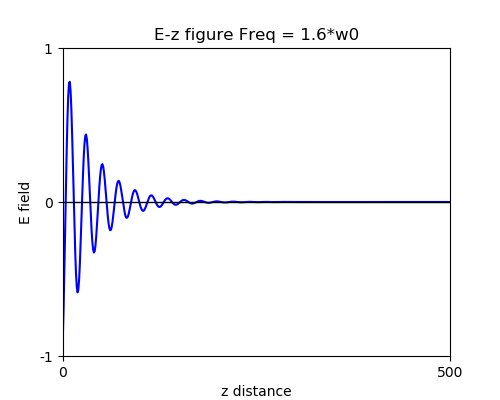

In [3]:
### Animation ###

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
w=1.6
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

# Set the range of z and time
zRange,zLength = 300, 500
z = np.linspace(0,zRange,zLength)
tRange, tLength = 100, 10000

# create figure and axes 
fig, (ax1) = plt.subplots(1,figsize=(5,4))

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')


def E_field(z,w,t):
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )

def animate(t):
    
    # create our line object
    E = E_field(z,w,t)
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],  # xticklabels=['0','zRange']
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])
    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.title('E-z figure Freq = 1.6*w0')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.show()

